In [2]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
#Plot import
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [6]:
X = iris.data
Y = iris.target

In [7]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
from sklearn.svm import SVC

In [8]:
model = SVC()

In [9]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.35, random_state = 3)

In [16]:
model.fit(X_train, Y_train) 

C:\Users\dharm\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
from sklearn import metrics

In [18]:
predicted = model.predict(X_test)

expected = Y_test

In [19]:
print (metrics.accuracy_score(expected,predicted))

0.9622641509433962


In [21]:
from sklearn import svm

In [22]:
X = iris.data[:,:2]
Y = iris.target

In [23]:
C = 1.0

In [24]:
svc = svm.SVC(kernel = 'linear',C=C).fit(X,Y)

In [25]:
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7, C=C).fit(X,Y)

In [26]:
poly_svc = svm.SVC(kernel = 'poly', degree = 3, C=C).fit(X,Y)

C:\Users\dharm\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [27]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

C:\Users\dharm\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
h = 0.02 # stepsize for mesh grid

x_min = X[:,0].min() - 1 #x axis min and max values define
x_max = X[:,0].max() + 1


In [34]:
y_min = X[:,1].min() - 1 #y axis min and max values define
y_max = X[:,1].max() + 1

In [30]:
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [31]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

C:\Users\dharm\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: linewidths is ignored by contourf
  del sys.path[0]
C:\Users\dharm\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: linewidths is ignored by contourf
  del sys.path[0]
C:\Users\dharm\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: linewidths is ignored by contourf
  del sys.path[0]
C:\Users\dharm\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: linewidths is ignored by contourf
  del sys.path[0]


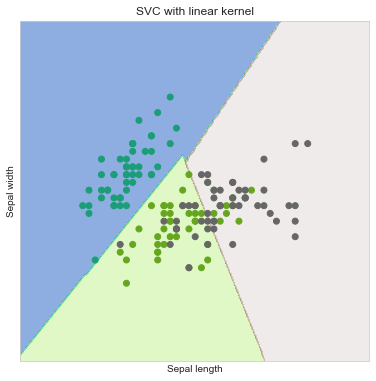

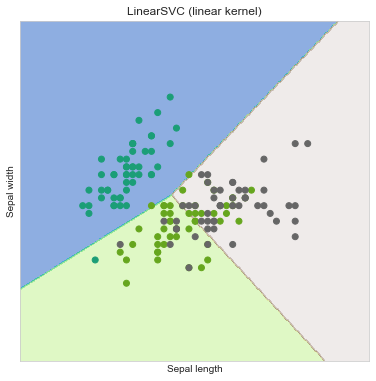

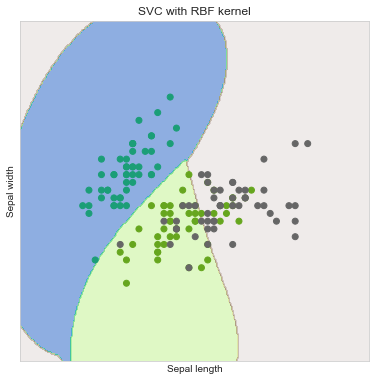

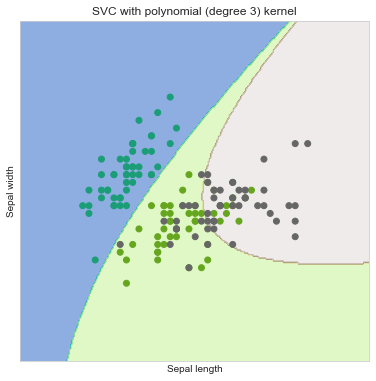

In [32]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)): #drawing from above titles,going through each model set its position as subplot 
                                                    #scatter data points and draw contour of these decision boundaries
    plt.figure(figsize=(15,15))                  # enumerate for keeping count
    
    plt.subplot(2,2,i+1)   # i+1 is enumerate +1 (for location)
    
    plt.subplots_adjust(wspace=0.4,hspace=0.4)  #(hspace is spacing between 4 plots )
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()]) # c_ translates slice objects into concatenation along second axis
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths = 0)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])